In [1]:
# Importing all the neccesary lirbaries required for data processing
import pandas as pd
import numpy as np
from PIL import Image
import cv2
import json
import skimage.io as io
from pycocotools

(512, 512)


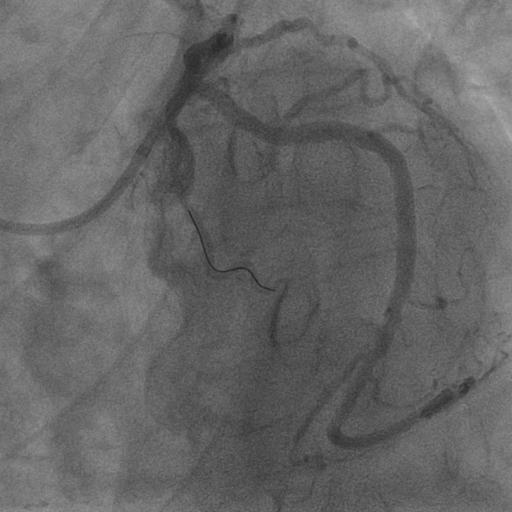

In [2]:
# Reading the data
img = Image.open("../data/raw/arcade/arcade/stenosis/train/images/1.png")
print(img.size)
img

In [3]:
with open("../data/raw/arcade/arcade/stenosis/train/annotations/train.json") as f:
    data = json.load(f)

In [4]:
data.keys()

dict_keys(['images', 'annotations', 'categories'])

In [5]:
len(data["images"]), len(data["annotations"]), len(data["categories"])

(1000, 1625, 26)

In [6]:
dt = pd.DataFrame(data = data["annotations"])

In [7]:
dt.head()

,id,image_id,category_id,segmentation,area,bbox,iscrowd,attributes
0,1,676,26,"[[278.0, 291.75, 286.75, 299.25, 289.5, 296.25...",708.0,"[278.0, 245.12, 42.75, 54.13]",0,{'occluded': False}
1,2,960,26,"[[294.75, 315.0, 293.0, 322.0, 298.5, 322.5, 3...",457.0,"[293.0, 315.0, 68.0, 23.25]",0,{'occluded': False}
2,3,960,26,"[[102.0, 172.25, 109.31, 179.25, 113.0, 175.75...",317.0,"[102.0, 157.38, 34.25, 21.87]",0,{'occluded': False}
3,4,960,26,"[[87.69, 192.62, 96.69, 198.75, 95.81, 203.0, ...",388.0,"[84.38, 192.62, 12.31, 43.63]",0,{'occluded': False}
4,5,99,26,"[[326.0, 232.62, 330.25, 231.38, 335.0, 239.75...",255.0,"[323.0, 221.25, 25.5, 26.13]",0,{'occluded': False}


In [8]:
dt["image_id"].value_counts()

image_id
252    7
136    7
74     6
339    6
876    6
      ..
330    1
245    1
267    1
576    1
578    1
Name: count, Length: 997, dtype: int64

In [9]:
dt[dt["image_id"] == 252]

,id,image_id,category_id,segmentation,area,bbox,iscrowd,attributes
881,882,252,26,"[[86.75, 118.0, 89.12, 113.38, 92.12, 109.69, ...",405.0,"[86.75, 93.12, 29.37, 31.19]",0,{'occluded': False}
882,883,252,26,"[[252.88, 165.75, 259.25, 159.75, 265.75, 157....",635.0,"[252.88, 131.0, 72.12, 39.62]",0,{'occluded': False}
883,884,252,26,"[[135.0, 189.5, 134.5, 172.25, 144.0, 171.5, 1...",904.0,"[134.5, 171.5, 70.62, 18.0]",0,{'occluded': False}
884,885,252,26,"[[81.38, 128.75, 79.44, 136.0, 79.06, 144.88, ...",866.0,"[78.56, 128.75, 24.88, 56.63]",0,{'occluded': False}
885,886,252,26,"[[261.25, 194.75, 256.75, 203.38, 259.0, 205.5...",566.0,"[256.75, 194.75, 66.5, 47.87]",0,{'occluded': False}
886,887,252,26,"[[168.25, 63.19, 169.12, 46.91, 154.75, 41.5, ...",623.0,"[127.81, 41.5, 41.31, 27.75]",0,{'occluded': False}
887,888,252,26,"[[119.0, 67.06, 132.5, 74.25, 132.75, 75.31, 1...",278.0,"[111.12, 67.06, 21.63, 23.56]",0,{'occluded': False}


From the primary observation, it seems there are unique 997 images and some images contains more than 1 and less than 7 segmentation masks for plaque detection

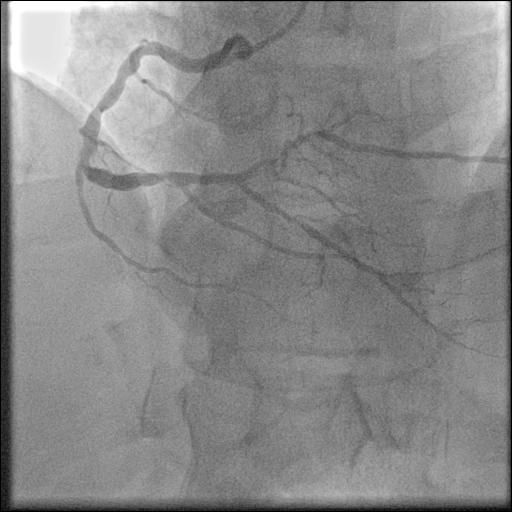

In [10]:
from PIL import Image

def read_image(file_path):
    """
    Reads an image file using Pillow (PIL).

    Parameters:
        file_path (str): The path to the image file.

    Returns:
        PIL.Image.Image: The image object.
    """
    try:
        # Open the image file
        image = Image.open(file_path)
        return image
    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
    except Exception as e:
        print(f"Error reading '{file_path}': {e}")
        return None

image_path = "../data/raw/arcade/arcade/stenosis/train/images/252.png"
img = read_image(image_path)
img

In [11]:
dt[dt["image_id"] == 252]

,id,image_id,category_id,segmentation,area,bbox,iscrowd,attributes
881,882,252,26,"[[86.75, 118.0, 89.12, 113.38, 92.12, 109.69, ...",405.0,"[86.75, 93.12, 29.37, 31.19]",0,{'occluded': False}
882,883,252,26,"[[252.88, 165.75, 259.25, 159.75, 265.75, 157....",635.0,"[252.88, 131.0, 72.12, 39.62]",0,{'occluded': False}
883,884,252,26,"[[135.0, 189.5, 134.5, 172.25, 144.0, 171.5, 1...",904.0,"[134.5, 171.5, 70.62, 18.0]",0,{'occluded': False}
884,885,252,26,"[[81.38, 128.75, 79.44, 136.0, 79.06, 144.88, ...",866.0,"[78.56, 128.75, 24.88, 56.63]",0,{'occluded': False}
885,886,252,26,"[[261.25, 194.75, 256.75, 203.38, 259.0, 205.5...",566.0,"[256.75, 194.75, 66.5, 47.87]",0,{'occluded': False}
886,887,252,26,"[[168.25, 63.19, 169.12, 46.91, 154.75, 41.5, ...",623.0,"[127.81, 41.5, 41.31, 27.75]",0,{'occluded': False}
887,888,252,26,"[[119.0, 67.06, 132.5, 74.25, 132.75, 75.31, 1...",278.0,"[111.12, 67.06, 21.63, 23.56]",0,{'occluded': False}


In [14]:
import matplotlib.pyplot as plt
from pycocotools import coco

In [13]:
file = coco.COCO()
I = io.imread(fname = "../data/raw/arcade/arcade/stenosis/train/images/252.png")
anns = file.loadAnns(file.getAnnIds(imgIds = [252]))

mask = np.zeros((512,512))
for a in anns:
    #anns = file.loadAnns(ids = [252])
    m = file.annToMask(a)
#     plt.imshow(m)
#     plt.show()
    mask += m
plt.imshow(mask)
plt.show()

NameError: name 'file' is not defined

In [88]:
ids = file.getAnnIds(imgIds = 252)
anns = file.loadAnns(ids = ids)

In [ ]:
file.loadAnns()

In [106]:
def convert_cooc_annotations_to_binary_masks(annotation_file):
    """
    
    """
    image_ids = annotation_file.getImgIds()[:2]
    masks = []
    
    for img_id in image_ids:
        
        mask = np.zeros(shape = (512, 512))

        annotations_ids = annotation_file.getAnnIds(imgIds = image_ids)

        annotations = annotation_file.loadAnns(ids = annotations_ids)
                
        
        for annotation in annotations:
            m = annotation_file.annToMask(annotation)
            
        mask += m
        
        masks.append(mask)
        
    return masks

In [105]:
masks = convert_cooc_annotations_to_binary_masks(file)

676
960
